<a href="https://colab.research.google.com/github/seungmei/ESAA_23_2/blob/main/5%EC%A3%BC%EC%B0%A8%EA%B8%88%EC%84%B8%EC%85%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 모듈 및 데이터 로드
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()

# x, y 데이터 생성
X = data.data

# 악성을 1, 양성을 0으로
y = 1 - data.target

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10]

# 로지스틱 회귀 모델 생성
model_lor = LogisticRegression(solver = 'lbfgs')
model_lor.fit(X,y)
y_pred = model_lor.predict(X)

* 오차 행렬(혼동 행렬) 생성

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y,y_pred)

array([[337,  20],
       [ 30, 182]])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

* 정확도

In [ ]:

accuracy = accuracy_score(y, y_pred)
accuracy

0.9121265377855887

* 정밀도

In [ ]:
precision = precision_score(y,y_pred)
precision

0.900990099009901

* 재현율

In [ ]:
recall = recall_score(y,y_pred)
recall

0.8584905660377359

* F1 score

In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y,y_pred)
f1

0.8792270531400966

* 예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.

In [ ]:
from sklearn.preprocessing import Binarizer
pred_proba = model_lor.predict_proba(X)
pred_proba.shape

(569, 2)

In [ ]:
model_lor.predict_proba(X)[:,1]

array([9.92326699e-01, 9.79683002e-01, 9.97653173e-01, 3.82208771e-01,
       9.96147131e-01, 1.30889793e-01, 9.76003273e-01, 5.08769428e-01,
       7.19957846e-01, 7.25876033e-01, 7.05477222e-01, 7.55650500e-01,
       9.99960820e-01, 9.10827561e-01, 9.36193356e-01, 9.56793394e-01,
       3.66015649e-01, 9.76490744e-01, 9.96014951e-01, 5.99471932e-02,
       1.05954346e-01, 3.94500559e-04, 8.05550738e-01, 9.97164156e-01,
       9.57721852e-01, 9.90024194e-01, 8.91050919e-01, 9.84507504e-01,
       9.76125000e-01, 8.74109446e-01, 9.99204520e-01, 8.70592956e-02,
       9.90214481e-01, 9.99212346e-01, 9.05212485e-01, 9.54885859e-01,
       6.52465213e-01, 3.23053268e-02, 5.21491572e-01, 3.92387513e-01,
       1.51246979e-01, 5.56892222e-02, 9.99643477e-01, 3.55158887e-01,
       2.41535105e-01, 9.90593234e-01, 2.32990489e-04, 1.97290749e-01,
       1.80340365e-02, 2.33480188e-01, 2.35925522e-02, 5.19364260e-02,
       1.24515516e-02, 9.84193394e-01, 5.31884902e-01, 1.18412719e-02,
      

In [ ]:
import numpy as np

# 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다.
y_pred2 = (model_lor.predict_proba(X)[:,1]>0.1).astype(np.int)
y_pred2

<ipython-input-31-7ab98f4bb690>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred2 = (model_lor.predict_proba(X)[:,1]>0.1).astype(np.int)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,

In [ ]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기
print(confusion_matrix(y,y_pred2))
print(accuracy_score(y, y_pred2))
print(precision_score(y,y_pred2))
print(recall_score(y,y_pred2))
print(f1_score(y, y_pred2))

[[267  90]
 [  6 206]]
0.8312829525483304
0.6959459459459459
0.9716981132075472
0.8110236220472441


* ROC 곡선 시각화

In [ ]:
from sklearn.metrics import roc_curve
probas = model_lor.predict_proba(X)
fpr, tpr, thresholds = roc_curve(y, probas[:,1])

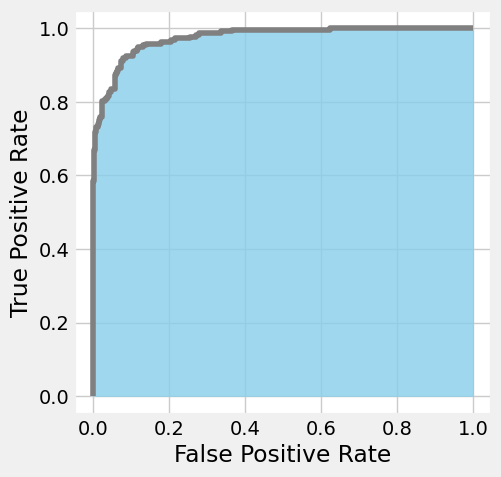

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
fig.set_size_inches(4.8, 5)
ax.step(fpr, tpr, 'gray')
ax.fill_between(fpr, tpr, 0, color='skyblue', alpha=0.8)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_facecolor('xkcd:white')
plt.show()

* ROC AUC 값

In [ ]:
from sklearn.metrics import roc_auc_score

roc_score = roc_auc_score(y, probas[:,1])
print('ROC AUC 값 : {:.4f}'.format(roc_score))

ROC AUC 값 : 0.9741
